# Decision Tree Regressor implementation

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# California House pricing Dataset
from sklearn.datasets import fetch_california_housing
california_df=fetch_california_housing()

In [9]:
print(california_df.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [11]:
df=pd.DataFrame(california_df.data, columns=california_df.feature_names)
df['target'] = california_df.target

In [12]:
df.shape

(20640, 9)

In [13]:
df = df.sample(frac=0.25)

In [14]:
df.shape

(5160, 9)

In [15]:
# independent and dependent variables
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [16]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
6131,3.0184,15.0,4.304982,1.078979,3131.0,3.804374,34.07,-117.98
10743,10.3682,37.0,8.077922,1.123377,394.0,2.558442,33.61,-117.92
13118,4.5368,20.0,6.113095,1.008929,934.0,2.779762,38.43,-121.22
19370,5.6445,8.0,7.710526,1.523923,851.0,2.035885,38.33,-123.00
13897,2.1820,15.0,6.047482,1.389928,1756.0,2.526619,34.18,-116.29


In [18]:
# splitting the data into the train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    X, y, test_size=0.33,random_state=42)


In [19]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

In [20]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [23]:
y_pred = regressor.predict(X_test)
y_pred

array([1.3    , 0.95   , 5.00001, ..., 5.00001, 0.814  , 1.531  ])

In [24]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

0.47817224953019977


In [26]:
# hyperparameter Tuning 
parameters ={
    'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6,7,8,9],
    'max_features':['auto','sqrt','log2']
}
regressor = DecisionTreeRegressor()

In [27]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
regressorcv = GridSearchCV(regressor, param_grid=parameters, cv=2, scoring='neg_mean_squared_error')

In [28]:
regressorcv.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [29]:
regressorcv.best_params_

{'criterion': 'poisson',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'best'}

In [30]:
regressor = DecisionTreeRegressor(criterion='poisson', max_depth=5, max_features='auto', splitter='best')

In [31]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=5, max_features='auto')

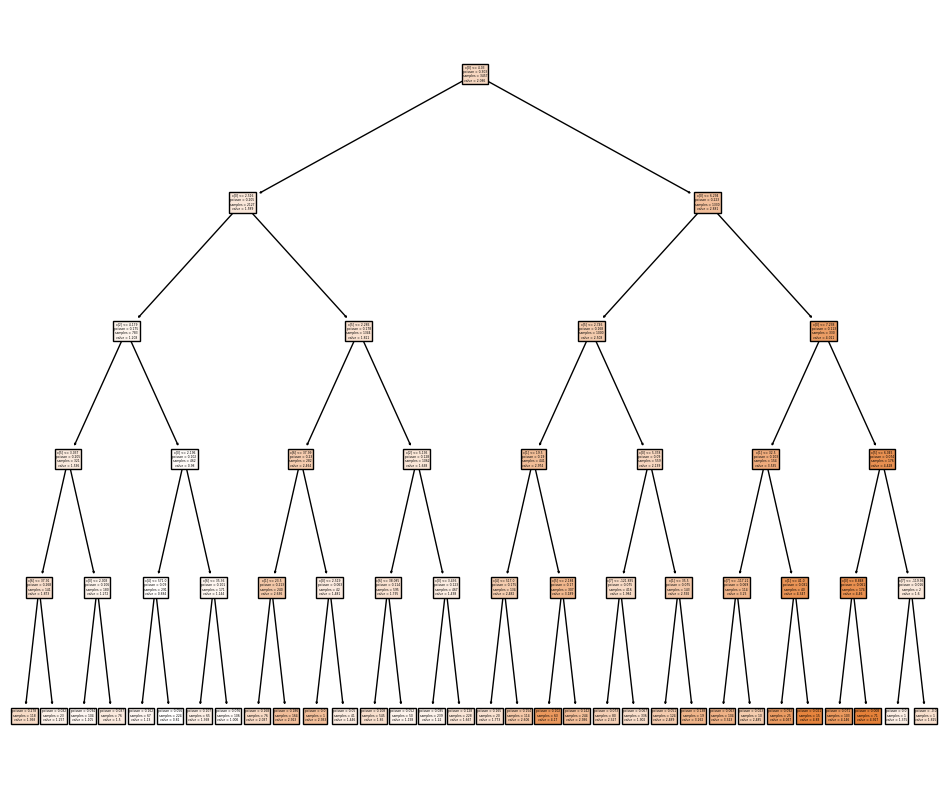

In [33]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(regressor, filled=True)
plt.show()

In [34]:
y_pred = regressorcv.predict(X_test)

In [35]:
score = r2_score(y_test,y_pred)
print(score)

0.5839529682910725
